In [15]:
import numpy as np
import pandas as pd
def get_accuracy_bandit(fp, best_arm_indexes):

    df = pd.read_csv(fp)
    df = df[['num_sims', 'horizon', 'chosen_arm']]

    n_simulations = int(np.max(df['num_sims'])) + 1
    time_horizon = int(np.max(df['horizon'])) + 1

    best_arms = np.zeros((n_simulations, time_horizon))  # each time point will have a best arm up to that point

    for n in range(int(n_simulations)):
        data = np.array(list(df.loc[df['num_sims'] == n]['chosen_arm']))
        for t in range(len(data)):
            u, counts = np.unique(data[:t+1], return_counts=True)
            best_arms[n, t] = u[np.random.choice(np.flatnonzero(counts == max(counts)))]

    isinfunc = lambda x: x in best_arm_indexes
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    probs = boo.sum(axis=0)/n_simulations

    return probs
fp=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\bandit\nickel_borylation_bayes_ucb_beta\log.csv'
nib = get_accuracy_bandit(fp, best_arm_indexes=[4, 16, 18])
print(nib)

[0.    0.    0.    0.    0.19  0.158 0.142 0.148 0.112 0.104 0.104 0.102
 0.054 0.05  0.064 0.064 0.104 0.112 0.15  0.168 0.144 0.128 0.128 0.052
 0.114 0.17  0.208 0.224 0.278 0.32  0.33  0.362 0.392 0.394 0.382 0.404
 0.42  0.456 0.442 0.446 0.488 0.478 0.498 0.5   0.52  0.512 0.528 0.538
 0.546 0.554 0.546 0.558 0.576 0.568 0.574 0.588 0.596 0.604 0.612 0.626
 0.636 0.636 0.632 0.632 0.634 0.64  0.644 0.65  0.64  0.644 0.656 0.658
 0.664 0.676 0.676 0.678 0.674 0.68  0.692 0.69  0.698 0.706 0.702 0.702
 0.712 0.718 0.718 0.726 0.732 0.732 0.732 0.746 0.728 0.734 0.74  0.756
 0.752 0.75  0.756 0.762]


In [16]:
import pandas as pd
import numpy as np
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()  
    time_horizon = df['horizon'].max()  
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions=['Cy-JohnPhos','P(p-Anis)3','PPh2Cy']
encondings=['mordred','One-hot','CM','EI','Morgan']
# encondings=['mordred','One-hot']
models=['svm','Gaussian_process','decision_tree','Random_forest','knn']
# models=['svm','Gaussian_process','decision_tree']
bins=[]
path=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Ni-catalyzed borylation\results'
for model in models:
    for enconding in encondings:
        bin=get_accuracy_bandit_model(path+f'\{model}_history_500_{enconding}_beta.csv', best_conditions)
        print(f'{model}_{enconding}',bin)
        bins.append(bin)

svm_mordred 0     0.000
1     0.000
2     0.000
3     0.000
4     0.188
      ...  
95    0.894
96    0.894
97    0.896
98    0.916
99    0.914
Length: 100, dtype: float64
svm_One-hot 0     0.000
1     0.000
2     0.000
3     0.000
4     0.182
      ...  
95    0.774
96    0.776
97    0.784
98    0.792
99    0.796
Length: 100, dtype: float64
svm_CM 0     0.000
1     0.000
2     0.000
3     0.000
4     0.238
      ...  
95    0.798
96    0.796
97    0.798
98    0.800
99    0.808
Length: 100, dtype: float64
svm_EI 0     0.000
1     0.000
2     0.000
3     0.000
4     0.220
      ...  
95    0.848
96    0.848
97    0.858
98    0.860
99    0.856
Length: 100, dtype: float64
svm_Morgan 0     0.000
1     0.000
2     0.000
3     0.000
4     0.218
      ...  
95    0.870
96    0.876
97    0.878
98    0.880
99    0.888
Length: 100, dtype: float64
Gaussian_process_mordred 0     0.000
1     0.000
2     0.000
3     0.000
4     0.196
      ...  
95    0.892
96    0.898
97    0.898
98    0.902
99    

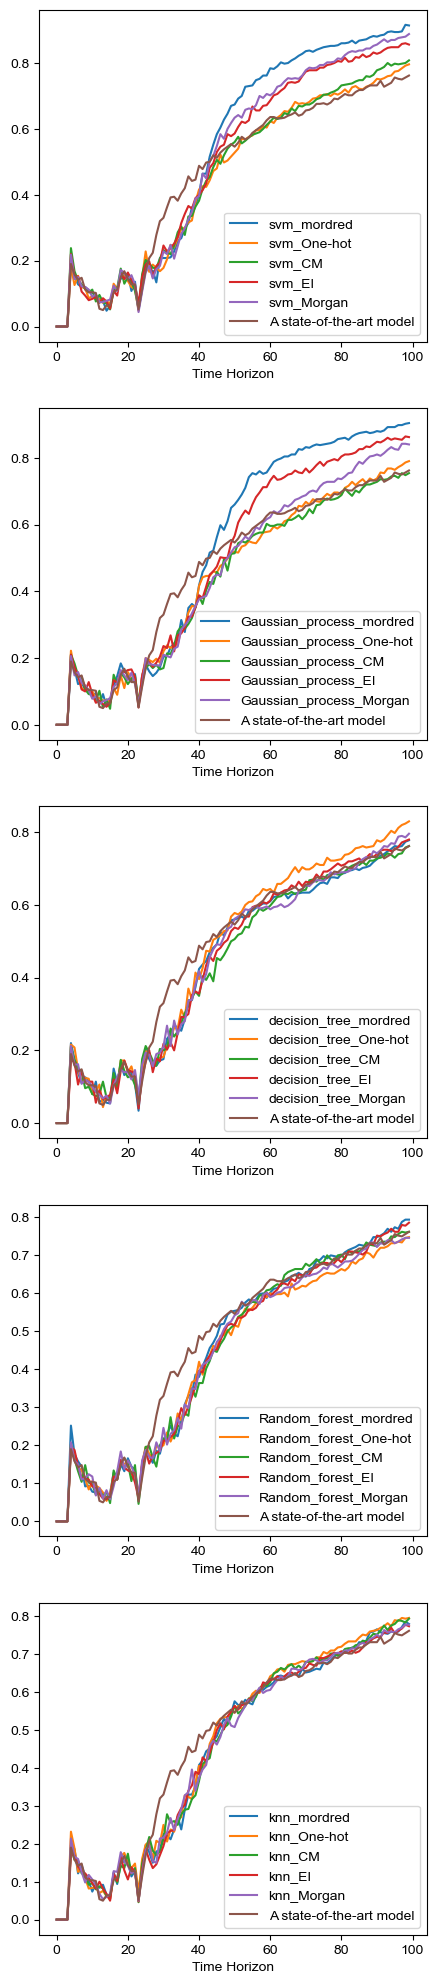

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
# import seaborn as sns
plt.figure(figsize=(5, 25))
# sns.set(style='whitegrid')
for i in range(len(models)):
    plt.subplot(len(models), 1, i+1)

    for j in range(len(encondings)):

        plt.plot(bins[i*len(encondings)+j], label=f'{models[i]}_{encondings[j]}')
    plt.plot(nib, label='A state-of-the-art model')
    plt.legend()
    plt.xlabel('Time Horizon')